# Importiere Daten


In [23]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
import os as os
import seaborn as sns

## Funktionen definieren

In [24]:
def linear_reg(x, m, t):
    return m*x + t

def generate_cosine_weight(angles):
    temp = np.cos(np.radians(angles))
    cosine_values = temp/np.sum(temp)
    return cosine_values

def weigth(arr):
    return np.multiply(generate_cosine_weight(arr['lat'].values), arr)

In [56]:
def weighting_arr(arr):
    lat = arr['lat']
    element_temp = ~np.isnan(arr.isel(time=0))
    ones_array = xr.ones_like(element_temp, dtype = float)
    cos_array_temp = ones_array * np.cos(np.radians(lat[:]))
    cos_array = cos_array_temp.where(element_temp)
    return cos_array

def weighting(arr, lat_min = -90, lat_max = 90, lon_min = -180, lon_max = 180):
    weight_arr = weighting_arr(arr).sel(lat = slice(lat_min, lat_max), lon = slice(lon_min, lon_max))
    temp =arr.sel(lat = slice(lat_min, lat_max), lon = slice(lon_min, lon_max))*weight_arr
    return temp.sum(dim= ['lat', 'lon'])/weight_arr.sum()

In [26]:
month_label = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

legend_colors = plt.cm.tab20(range(12))

In [27]:
custom_rc_params_small = {
    'figure.figsize': (8.5, 5),  # Width x Height in centimeters
    'font.size': 12,  # Font size
    # You can add more custom parameters here if needed
}

plt.rcParams.update(custom_rc_params_small)

## Daten importieren

In [28]:
TMin_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
TMax_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'
TAvg_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.tmp.dat.nc/cru_ts4.07.1901.2022.tmp.dat.nc'
DTR_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.dtr.dat.nc/cru_ts4.07.1901.2022.dtr.dat.nc'

# TMin = xr.open_dataset(TMin_file)
TMax = xr.open_dataset(TMax_file)
TAvg = xr.open_dataset(TAvg_file)
DTR_CRU_dat = xr.open_dataset(DTR_file)


In [29]:
# TMin = TMin.sel(lat = slice(0,90))
# TMax = TMax.sel(lat = slice(0,90))
# TAvg = TAvg.sel(lat = slice(0,90))

## Differenz berechnen

In [30]:
start_date = pd.to_datetime('1972')
end_date = pd.to_datetime('2023')

In [31]:
DTR = DTR_CRU_dat.dtr.sel(time = slice(start_date, end_date))# TMax.tmx.sel(time = slice(pd.to_datetime('1900'), pd.to_datetime('2023'))) - TMin.tmn.sel(time = slice(pd.to_datetime('1900'), pd.to_datetime('2023')))
TAvg_time = TAvg.tmp.sel(time = slice(start_date,end_date)).mean('time') #lat = slice(70,84), 

In [32]:
T_Avg_month = TAvg.tmp.copy()

## DTR mal anschauen

In [33]:
# DTR_CRU_dat

# data1 = DTR_CRU_dat.dtr.sel(time = slice(pd.to_datetime('1960-01-16'), pd.to_datetime('1970-01-16'))).mean(dim = 'time')
# data2 = DTR_CRU_dat.dtr.sel(time = slice(pd.to_datetime('1980-01-16'), pd.to_datetime('1990-01-16'))).mean(dim = 'time')


# x_coords = TAvg_time.coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))
# heatmap = plt.imshow(data1-data2, cmap='seismic', origin='lower', vmin= -1.2, vmax = 1.2, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# #plt.title('$T_{Avg}$')
# plt.xlabel('longitude')
# plt.ylabel('latitude')

# plt.tight_layout()
# plt.show()

In [34]:

# x_coords = TAvg_time.coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))
# heatmap = plt.imshow(DTR.sel(time = pd.to_datetime('1901-01-16')), cmap='seismic', origin='lower', extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# #plt.title('$T_{Avg}$')
# plt.xlabel('longitude')
# plt.ylabel('latitude')

# plt.tight_layout()
# plt.show()



In [35]:
# DTR_CRU_mean = DTR_CRU_dat.sel(lat=slice(-10, 10), lon = slice(-180, 0)).mean(dim=['lat', 'lon'])
# DTR_CRU_yearly_mean =  DTR_CRU_mean.dtr.resample(time='Y').mean()
# plt.plot(DTR_CRU_yearly_mean.time, DTR_CRU_yearly_mean)
# plt.xlim(pd.to_datetime('1950'),)

In [36]:
# DTR_CRU_yearly_mean =  DTR_CRU_mean.dtr.resample(time='Y').mean()

In [37]:
# plt.plot(DTR_CRU_yearly_mean.time, DTR_CRU_yearly_mean)
# plt.xlim(pd.to_datetime('1950'),)

In [38]:
# #Alternative

# DTR = TMax.tmx.sel(time = slice(pd.to_datetime('1985'), pd.to_datetime('2023'))) - TMin.tmn.sel(time = slice(pd.to_datetime('1969'), pd.to_datetime('2023')))
# TAvg_time = TAvg.tmp.sel(time = slice(pd.to_datetime('1985'), pd.to_datetime('2023'))).mean('time') #lat = slice(70,84), 


In [39]:


# x_coords = TAvg_time.coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))
# heatmap = plt.imshow(TMax.stn.sel(time = pd.to_datetime('1970-01-16')), cmap='seismic', origin='lower', extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# #plt.title('$T_{Avg}$')
# plt.xlabel('longitude')
# plt.ylabel('latitude')

# plt.tight_layout()
# plt.show()


In [40]:

# x_coords = TAvg_time.coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))

# array = TMax.stn.sel(time = pd.to_datetime('1980-01-16'))-TMax.stn.sel(time = pd.to_datetime('1965-01-16'))

# boundary = np.max([array.max(), np.abs(array.min())])

# heatmap = plt.imshow(array, cmap='seismic', origin='lower', vmin= -boundary, vmax=boundary, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# #plt.title('$T_{Avg}$')
# plt.xlabel('longitude')
# plt.ylabel('latitude')

# plt.tight_layout()
# plt.show()



In [41]:

# x_coords = TAvg_time.coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))
# heatmap = plt.imshow(TMax.stn.sel(time = pd.to_datetime('1970-01-16')), cmap='seismic', origin='lower', extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# #plt.title('$T_{Avg}$')
# plt.xlabel('longitude')
# plt.ylabel('latitude')

# plt.tight_layout()
# plt.show()

## DTR Average

In [42]:
DTR_resamples_year = DTR_CRU_dat.resample(time = 'Y').mean()

In [43]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import pandas as pd



# # Set up the figure
# fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
# x_coords = TAvg_time.coords['lon'].values
# y_coords = TAvg_time.coords['lat'].values
# heatmap = ax.imshow(DTR_CRU_dat.stn.sel(time=pd.to_datetime('1901-01-16')), cmap='seismic', origin='lower',
#                     extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
# cbar = plt.colorbar(heatmap, shrink=0.45, label='$number of stations$')
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')
# plt.tight_layout()

# # Animation function
# def update(frame):
#     date = pd.to_datetime(f'{1901 + frame}-01-16')
#     data = DTR_CRU_dat.stn.sel(time=date)
#     data_2d = data.values.reshape(len(y_coords), len(x_coords))
#     heatmap.set_array(data_2d)
#     ax.set_title(f'number of stations - {date.year}')
#     return heatmap

# # Number of frames (years)
# num_frames = 2022 - 1901 + 1

# # Create the animation
# animation = FuncAnimation(fig, update, frames=num_frames, interval=200, repeat=False)

# # Save the animation as a GIF (you can adjust the filename and writer as needed)
# animation.save('DTR_datacoverage.gif', writer='imagemagick')

# # Show the animation
# plt.show()

In [44]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import pandas as pd

# #DTR_resamples_year = DTR_CRU_dat.stn.resample(time = 'Y').mean()

# # Set up the figure
# fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
# x_coords = TAvg_time.coords['lon'].values
# y_coords = TAvg_time.coords['lat'].values
# heatmap = ax.imshow(DTR_resamples_year.stn.sel(time=pd.to_datetime('1901-12-31')), cmap='seismic', origin='lower',
#                     extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
# cbar = plt.colorbar(heatmap, shrink=0.45, label='stn')
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')
# plt.tight_layout()

# # Animation function
# def update(frame):
#     date = pd.to_datetime(f'{1901 + frame}-12-31')
#     data = DTR_resamples_year.stn.sel(time=date)
#     data_2d = data.values.reshape(len(y_coords), len(x_coords))
#     heatmap.set_array(data_2d)
#     ax.set_title(f'number of stations - {date.year}')
#     return heatmap

# # Number of frames (years)
# num_frames = 2022 - 1901 + 1

# # Create the animation
# animation = FuncAnimation(fig, update, frames=num_frames, interval=200, repeat=False)

# # Save the animation as a GIF (you can adjust the filename and writer as needed)
# animation.save('DTR_datacoverage_average.gif', writer='imagemagick')

# # Show the animation
# plt.show()

In [45]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import pandas as pd

# #DTR_resamples_year = DTR_CRU_dat.stn.resample(time = 'Y').mean()



# # Set up the figure
# fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
# x_coords = TAvg_time.coords['lon'].values
# y_coords = TAvg_time.coords['lat'].values
# heatmap = ax.imshow(DTR_resamples_year.stn.sel(time=pd.to_datetime('1901-12-31')), cmap='seismic', origin='lower',
#                     extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
# cbar = plt.colorbar(heatmap, shrink=0.45, label='stn')
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')
# plt.tight_layout()

# # Animation function
# def update(frame):
#     date = pd.to_datetime(f'{1901 + frame}-12-31')
#     data = DTR_resamples_year.stn.sel(time=date)
#     data_2d = data.values.reshape(len(y_coords), len(x_coords))
#     heatmap.set_array(data_2d)
#     ax.set_title(f'number of stations - {date.year}')
#     return heatmap

# # Number of frames (years)
# num_frames = 2022 - 1901 + 1

# # Create the animation
# animation = FuncAnimation(fig, update, frames=num_frames, interval=200, repeat=False)

# # Save the animation as a GIF (you can adjust the filename and writer as needed)
# animation.save('DTR_datacoverage_average.gif', writer='imagemagick')

# # Show the animation
# plt.show()

In [46]:
DTR_median = DTR_resamples_year.dtr.median(dim = ['time'])

In [47]:
DTR_resamples_year_minus_median = DTR_resamples_year.dtr - DTR_median

MovieWriter imagemagick unavailable; using Pillow instead.


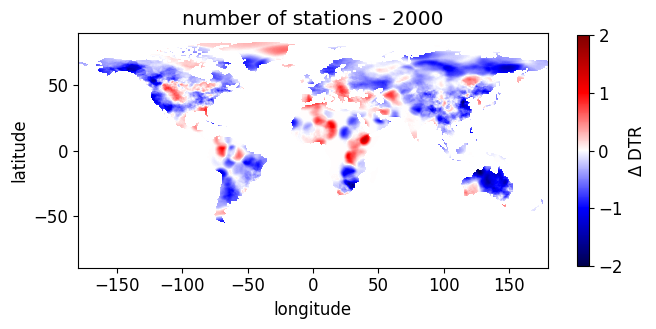

In [48]:
# # Set up the figure
# fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
# x_coords = TAvg_time.coords['lon'].values
# y_coords = TAvg_time.coords['lat'].values
# heatmap = ax.imshow(DTR_resamples_year_minus_median.sel(time=pd.to_datetime('1950-12-31')), cmap='seismic', origin='lower',vmax = 2, vmin = -2, 
#                     extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
# cbar = plt.colorbar(heatmap, shrink=0.45, label='$\Delta $ DTR')
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')
# plt.tight_layout()

# # Animation function
# def update(frame):
#     date = pd.to_datetime(f'{1950 + frame}-12-31')
#     data = DTR_resamples_year_minus_median.sel(time=date)
#     data_2d = data.values.reshape(len(y_coords), len(x_coords))
#     heatmap.set_array(data_2d)
#     ax.set_title(f'number of stations - {date.year}')
#     return heatmap

# # Number of frames (years)
# num_frames = 2000 - 1950 + 1

# # Create the animation
# animation = FuncAnimation(fig, update, frames=num_frames, interval=500, repeat=False)

# # Save the animation as a GIF (you can adjust the filename and writer as needed)
# animation.save('DTR_minus_median.gif', writer='imagemagick')

# # Show the animation
# plt.show()

In [49]:
# x_coords = TAvg_time.coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))
# heatmap = plt.imshow(TAvg_time, cmap='seismic', origin='lower', extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# #plt.title('$T_{Avg}$')
# plt.xlabel('longitude')
# plt.ylabel('latitude')

# plt.tight_layout()
# plt.show()

### Montly averaging

In [50]:
# DTR_sorted_month = {}  # Generates a dict of dicts. First layer contains bins, second contains month


# for month in range(1, 13):
#     # Slice the DataArray for the current month
#     month_data = DTR.where(DTR['time.month'] == month, drop=True)
    
#     # Add the sliced DataArray to the dictionary with the month as the key
#     DTR_sorted_month[month] = month_data.copy()
    


In [51]:
DTR_sorted_month = {}
TAvg_sorted_month = {}
# Assuming DTR is an xarray DataArray or Dataset

# Extract the month information from the time dimension
months = DTR['time.month'].values

# Unique months
unique_months = np.unique(months)

for month in unique_months:
    # Use NumPy indexing to get the slices for each month
    month_indices = np.where(months == month)[0]
    month_data = DTR.isel(time=month_indices)
    
    # Store the sliced DataArray in the dictionary
    DTR_sorted_month[month] = month_data

for month in unique_months:
    # Use NumPy indexing to get the slices for each month
    month_indices = np.where(months == month)[0]
    month_data = TAvg.tmp.isel(time=month_indices)
    
    # Store the sliced DataArray in the dictionary
    TAvg_sorted_month[month] = month_data

In [52]:
#Create temaporal averages for each month each point
TAvg_sorted_month_timeaverage = {};
for month in unique_months:
    TAvg_sorted_month_timeaverage[month] = TAvg_sorted_month[month].mean(dim = ['time']).copy()

In [53]:
# Now we bin generate the masks for every TAvg month
TAvg_sorted_month_bin = {};
d = 2  # Adjust this value to your desired interval length



for month in unique_months:
    # Create bins for the 'x' values
    TAvg_time_bin_temp = ((TAvg_sorted_month_timeaverage[month]// d) * d).copy()

    TAvg_time_bin_temp = TAvg_time_bin_temp.rename('bin')

    TAvg_time_combined = xr.merge([TAvg_sorted_month_timeaverage[month], TAvg_time_bin_temp])
    TAvg_sorted_month_bin[month] = TAvg_time_combined.copy()
    #print(TAvg_time_combined)

    #unique_bins = xr.DataArray(np.unique(TAvg_time_combined['bin']), dims='bin', name='unique_bins')[:-1]


In [54]:
np.unique(TAvg_sorted_month_bin[1]['bin'].values)[:-1]

array([-52., -50., -48., -46., -44., -42., -40., -38., -36., -34., -32.,
       -30., -28., -26., -24., -22., -20., -18., -16., -14., -12., -10.,
        -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,
        14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.],
      dtype=float32)

In [57]:
#Now I generate 1D elements that are the DTR per month binnes
DTR_sorted_month_timeseries_bin = {}


for month in unique_months:
    DTR_TS_temp = {}
    for i in list(np.unique(TAvg_sorted_month_bin[month]['bin'].values)[:-1]):
        DTR_TS_temp_element = DTR_sorted_month[month].where(TAvg_sorted_month_bin[month]['bin'] == i)
        DTR_TS_temp[i] = weighting(DTR_TS_temp_element)# .mean(dim = ['lon', 'lat'])
    DTR_sorted_month_timeseries_bin[month] = DTR_TS_temp

# TAvg_month_dict = {}
# for i in list(unique_bins_month.values):
#     TAvg_month_dict[str(i)] = (TAvg_month_combined.bin == i)  # Generates masks
#     print(str(i))


# DTR_binned_timeseries_mothly_bin = {}
    
# for i in list(unique_bins_month.values):
#     DTR_binned_timeseries_mothly_bin[str(i)] = DTR.where(TAvg_month_dict[str(i)]).mean(dim=['lat', 'lon'])
#     print(str(i))

In [58]:
# Create lists to store legend handles
legend_handles = []

# Create lists to store regression coefficients and R-squared values
regression_coeffs = []
r_squared_values = []

# startdate = pd.to_datetime('1973-01-01')
# enddate = pd.to_datetime('2023-01-01')
index = '0.0'

DTR_trend_month_dict_binned = {}
for month in unique_months:
    regression_coeffs = {}
    for tbin in list(DTR_sorted_month_timeseries_bin[month]):
        #color = legend_colors[i - 1]
        # Filter the data for the specified date range (1960-01-01 to 1980-12-31)
        
        x = np.arange(len(DTR_sorted_month_timeseries_bin[month][tbin]['time']))  # Use an index as x values
        y = DTR_sorted_month_timeseries_bin[month][tbin]

        # Fit a linear regression line
        slope, intercept = np.polyfit(x, y, 1)
        
        # Calculate R-squared
        residuals = y - (slope * x + intercept)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Append regression coefficients and R-squared values to lists
        regression_coeffs[tbin] = slope
        #r_squared_values.append(r_squared)

    DTR_trend_month_dict_binned[month] = regression_coeffs.copy()



In [59]:
indexlist_temp = []
for i in list(DTR_trend_month_dict_binned):
    indexlist_temp = indexlist_temp + list(DTR_trend_month_dict_binned[i])

unique_bins_all = np.unique(indexlist_temp)
del indexlist_temp


print(unique_bins_all)

[-52. -50. -48. -46. -44. -42. -40. -38. -36. -34. -32. -30. -28. -26.
 -24. -22. -20. -18. -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.
   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.  30.
  32.  34.  36.  38.]


In [60]:
dfs = []

# Iterate through the range 1 to 12
for i in list(unique_months):
    # Create a DataFrame for each dictionary
    df = pd.DataFrame(DTR_trend_month_dict_binned[i].values(), index=list(DTR_trend_month_dict_binned[i]), columns=[str(i)])
    dfs.append(df)

# Concatenate all DataFrames along columns
trend_data_bin_month = pd.concat(dfs, axis=1)


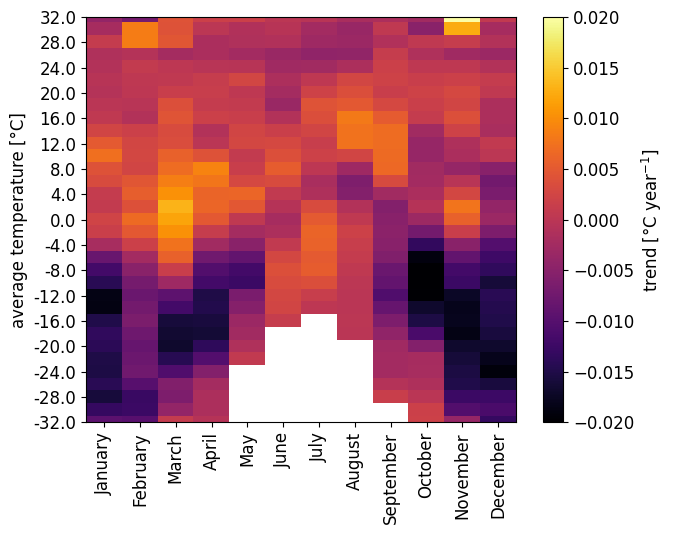

In [72]:

boundary = 0.02

# Create a mask for NaN values
mask = trend_data_bin_month.isna()

# Create a heatmap using matplotlib
plt.figure(figsize=(17/2.46, 5.5))
heatmap = plt.imshow(np.ma.masked_where(mask, trend_data_bin_month),cmap='inferno', origin='lower',vmin= -boundary, vmax=boundary, aspect='auto')

#cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')


# Display row and column labels
plt.xticks(range(len(trend_data_bin_month.columns)), month_label, rotation='vertical')
plt.yticks(range(len(trend_data_bin_month.index))[::3-1], trend_data_bin_month.index[::3-1])

plt.ylabel('average temperature [°C]')
# Display colorbar
plt.colorbar(label='trend [°C year$^{-1}$]')

plt.ylim(10,42)
# Show the plot

plt.tight_layout()
plt.savefig('binned_trends_heatmap_month_averages_weighted.pdf')
plt.show()

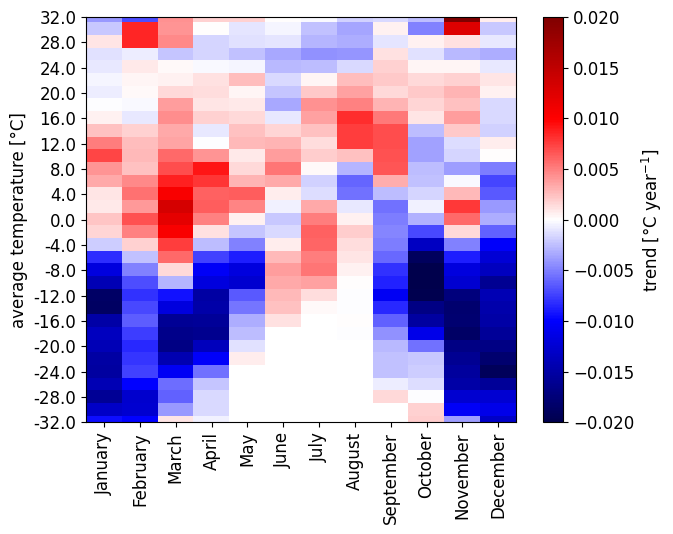

In [73]:

boundary = 0.02

# Create a mask for NaN values
mask = trend_data_bin_month.isna()

# Create a heatmap using matplotlib
plt.figure(figsize=(17/2.46, 5.5))
heatmap = plt.imshow(np.ma.masked_where(mask, trend_data_bin_month),cmap='seismic', origin='lower',vmin= -boundary, vmax=boundary, aspect='auto')

#cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')


# Display row and column labels
plt.xticks(range(len(trend_data_bin_month.columns)), month_label, rotation='vertical')
plt.yticks(range(len(trend_data_bin_month.index))[::3-1], trend_data_bin_month.index[::3-1])

plt.ylabel('average temperature [°C]')
# Display colorbar
plt.colorbar(label='trend [°C year$^{-1}$]')

plt.ylim(10,42)
# Show the plot

plt.tight_layout()
plt.savefig('binned_trends_heatmap_month_averages_seismic_weighted.pdf')
plt.show()

In [63]:
averaged_1D_bins = np.mean(trend_data_bin_month, axis = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


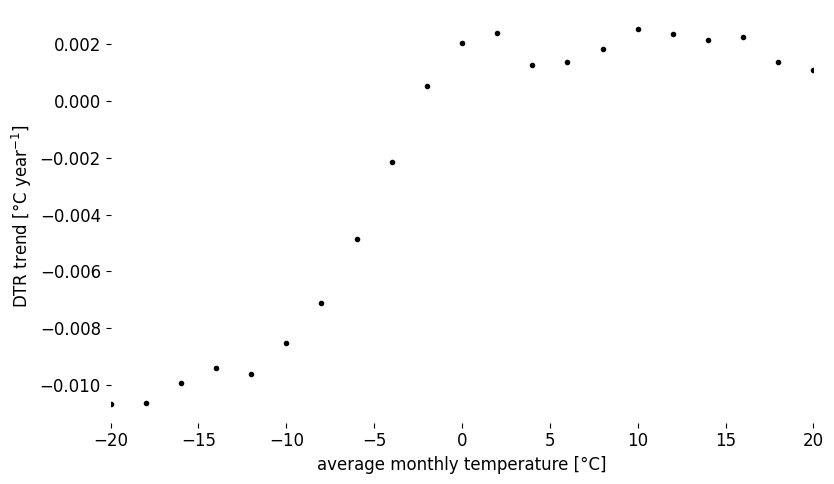

In [64]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
plt.plot(averaged_1D_bins, marker='.', ls='', color='black')#, label='Svalbard')


# Set the x and y limits
#plt.xlim(-20, 10)
#plt.ylim(2, 9)

# Set labels for x and y axes
plt.xlabel('average monthly temperature [°C]')
plt.ylabel('DTR trend [°C year$^{-1}$]')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlim(-20,20)

# Add a legend
plt.legend(loc = 3, frameon = False)

# Display the plot
plt.tight_layout()


plt.savefig('1D_heatmap.pdf')
plt.show()


In [65]:
averaged_1D_bins

-52.0   -0.007668
-50.0   -0.007664
-48.0   -0.010660
-46.0   -0.004996
-44.0   -0.005896
-42.0   -0.002448
-40.0   -0.002335
-38.0   -0.002050
-36.0   -0.002553
-34.0   -0.003936
-32.0   -0.004829
-30.0   -0.007284
-28.0   -0.007516
-26.0   -0.008090
-24.0   -0.009727
-22.0   -0.009507
-20.0   -0.010649
-18.0   -0.010610
-16.0   -0.009908
-14.0   -0.009405
-12.0   -0.009590
-10.0   -0.008510
-8.0    -0.007124
-6.0    -0.004847
-4.0    -0.002147
-2.0     0.000519
 0.0     0.002028
 2.0     0.002404
 4.0     0.001255
 6.0     0.001369
 8.0     0.001821
 10.0    0.002537
 12.0    0.002338
 14.0    0.002125
 16.0    0.002245
 18.0    0.001383
 20.0    0.001098
 22.0    0.001006
 24.0   -0.000448
 26.0   -0.002165
 28.0    0.000329
 30.0    0.000773
 32.0    0.001910
 34.0   -0.000691
 36.0    0.000745
 38.0   -0.002127
dtype: float64

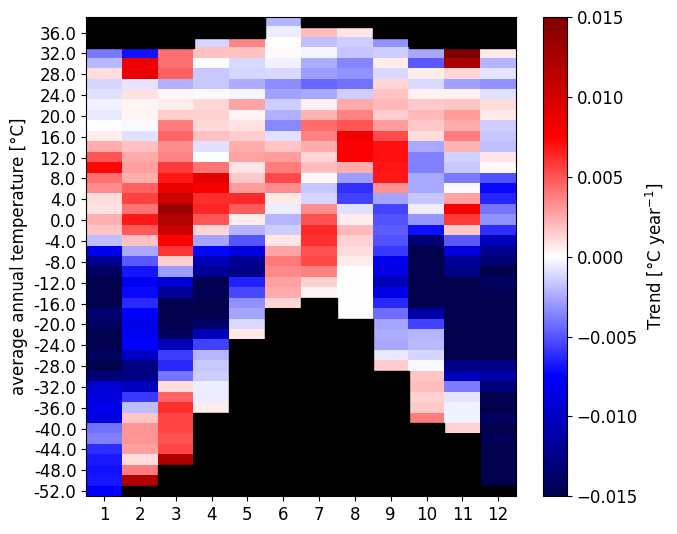

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assuming 'trend_data_bin_month' is your DataFrame
boundary = 0.015

# Create a colormap with NaN values marked as black
cmap = plt.cm.seismic
cmap.set_bad(color='black')

# Create a heatmap using matplotlib with NaN values colored as black
plt.figure(figsize=(17/2.46, 5.5))
heatmap = plt.imshow(trend_data_bin_month, cmap=cmap, origin='lower', vmin=-boundary, vmax=boundary, aspect='auto')

# Highlight NaN values with hatching
for i in range(len(trend_data_bin_month.index)):
    for j in range(len(trend_data_bin_month.columns)):
        if np.isnan(trend_data_bin_month.iloc[i, j]):
            rect = Rectangle((j - 0.5, i - 0.5), 1, 1, hatch='/', edgecolor='black', facecolor='black')
            plt.gca().add_patch(rect)

# Display row and column labels
plt.xticks(range(len(trend_data_bin_month.columns)), trend_data_bin_month.columns)
plt.yticks(range(len(trend_data_bin_month.index))[::3-1], trend_data_bin_month.index[::3-1])

plt.ylabel('average annual temperature [°C]')
# Display colorbar
plt.colorbar(label='Trend [°C year$^{-1}$]')

# Show the plot
plt.tight_layout()
plt.show()



In [67]:
# Creating df

df1 = pd.DataFrame(DTR_trend_month_dict_binned[1].values(), index=list(DTR_trend_month_dict_binned[1]), columns=['1'])
df2 = pd.DataFrame(DTR_trend_month_dict_binned[2].values(), index=list(DTR_trend_month_dict_binned[2]), columns=['2'])

result = pd.concat([df1, df2], axis = 1)
# Display the DataFrame
result.head()

,1,2
-52.0,-0.007668,NaN
-50.0,-0.006879,0.012018
-48.0,-0.006922,0.003820
-46.0,-0.006777,0.000938
-44.0,-0.006157,0.002803


In [68]:

# Assuming df1 and df2 are your two DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenate along rows (axis=0)
result = pd.concat([df1, df2], axis=0)

# Concatenate along columns (axis=1)
# result = pd.concat([df1, df2], axis=1)

print(result)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8


In [69]:
# Assuming df1 and df2 are your two DataFrames
df1 = pd.DataFrame({'key': ['A', 'B'], 'value1': [1, 2]})
df2 = pd.DataFrame({'key': ['A', 'B'], 'value2': [3, 4]})

# Merge based on the 'key' column
result = pd.merge(df1, df2, on='key')

print(result)

  key  value1  value2
0   A       1       3
1   B       2       4


In [70]:
# Assuming your NumPy array is named 'my_array'
my_array = np.array([[1, 'A'], [2, 'B'], [3, 'C']])

# Creating a DataFrame with the first column as the index
df = pd.DataFrame(my_array[:, 1], index=my_array[:, 0], columns=['Column_B'])

# Display the DataFrame
print(df)

  Column_B
1        A
2        B
3        C


In [71]:
# Convert the dictionary of lists to a NumPy array
slope_array = np.array([values for values in DTR_trend_month_dict.values()])

print((slope_array[2]))

# x_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

boundary = np.max([slope_array.max(), np.abs(slope_array.min())])

# Create a heatmap using Matplotlib
plt.figure(figsize=(17/2.46, 5.5))
heatmap = plt.imshow(slope_array, cmap='seismic', origin='lower',vmin= -boundary, vmax=boundary, aspect=0.5) #, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
plt.xticks(np.arange(12), month_label, rotation='vertical')
plt.yticks(np.arange(slope_array.shape[0])[::3], unique_bins.values[::3])#, rotation='vertical')
#plt.title('$T_{Avg}$')
# plt.xlabel('average temperature [°C]')
plt.ylabel('average annual temperature [°C]')


plt.tight_layout()
plt.savefig('binned_trends_heatmap.pdf')
plt.show()

NameError: name 'DTR_trend_month_dict' is not defined

## Create Means

In [ ]:
TAvg_mask_dict = {}
for i in list(unique_bins.values):
    TAvg_mask_dict[str(i)] = (TAvg_time_combined.bin == i)
    print(str(i))


NameError: name 'unique_bins' is not defined

In [ ]:
DTR_binned_timeseries = {}
    
for i in list(unique_bins.values):
    DTR_binned_timeseries[str(i)] = DTR.where(TAvg_mask_dict[str(i)]).mean(dim=['lat', 'lon'])
    print(str(i))

-33.0
-30.0
-27.0
-24.0
-21.0
-18.0
-15.0
-12.0
-9.0
-6.0
-3.0
0.0
3.0
6.0
9.0
12.0
15.0
18.0
21.0
24.0
27.0
30.0


In [ ]:
# DTR_binned_timeseries['-45.0'].head()

In [ ]:
monthly_DTR_per_bin_dict = {}
for i in list(unique_bins.values):
    monthly_mean_DTR_dict = {}
    for month in range(1, 13):
        # Slice the DataArray for the current month
        month_data = DTR_binned_timeseries[str(i)].where(DTR_binned_timeseries[str(i)]['time.month'] == month, drop=True)
        
        # Add the sliced DataArray to the dictionary with the month as the key
        monthly_mean_DTR_dict[month] = month_data
    
    monthly_DTR_per_bin_dict[str(i)] = monthly_mean_DTR_dict.copy()

In [ ]:
# Create lists to store legend handles
legend_handles = []

# Create lists to store regression coefficients and R-squared values
regression_coeffs = []
r_squared_values = []

# startdate = pd.to_datetime('1973-01-01')
# enddate = pd.to_datetime('2023-01-01')
index = '0.0'

DTR_trend_month_dict = {}
for index in list(unique_bins.values):
    regression_coeffs = []
    for i in range(1, 13):
        #color = legend_colors[i - 1]
        # Filter the data for the specified date range (1960-01-01 to 1980-12-31)
        
        
        x = np.arange(len(monthly_DTR_per_bin_dict[str(index)][i]['time']))  # Use an index as x values
        y = monthly_DTR_per_bin_dict[str(index)][i]

        # Fit a linear regression line
        slope, intercept = np.polyfit(x, y, 1)
        
        # Calculate R-squared
        residuals = y - (slope * x + intercept)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Plot the scatter plot
        #plt.scatter(monthly_DTR_per_bin_dict[str(index)][i]['time'], y, marker='x', color=color, label= month_label[i-1])
        
        # Plot the regression line
        #plt.plot(monthly_DTR_per_bin_dict[str(index)][i]['time'], slope * x + intercept, color=color, linestyle='--', alpha  = 0.5)

        # Create a dummy scatter plot with no markers to represent the legend
        #legend_handles.append(plt.scatter([], [], marker='.', color=color))

        # Append regression coefficients and R-squared values to lists
        regression_coeffs.append(slope)
        r_squared_values.append(r_squared)

    DTR_trend_month_dict[str(index)] = regression_coeffs.copy()



In [ ]:
print(unique_bins.values)

[-33. -30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.
   9.  12.  15.  18.  21.  24.  27.  30.]


[-0.00146973 -0.00017285 -0.00025975 -0.00194827 -0.00171822  0.00031005
  0.00135832 -0.00077134 -0.00254424 -0.00122405 -0.00093693 -0.0009439 ]


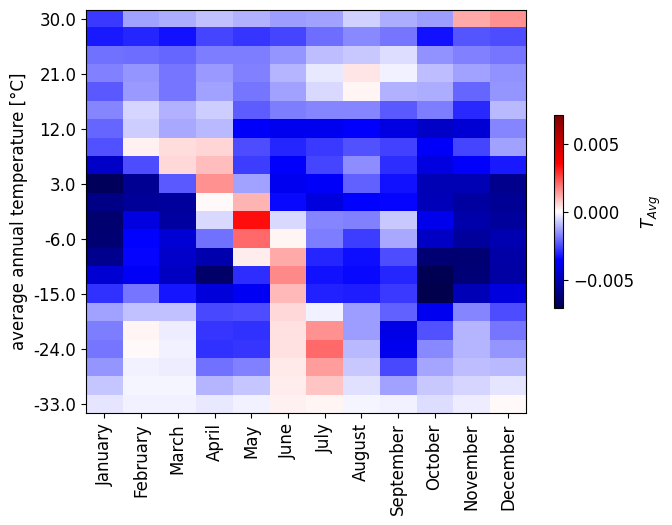

In [ ]:
# Convert the dictionary of lists to a NumPy array
slope_array = np.array([values for values in DTR_trend_month_dict.values()])

print((slope_array[2]))

# x_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

boundary = np.max([slope_array.max(), np.abs(slope_array.min())])

# Create a heatmap using Matplotlib
plt.figure(figsize=(17/2.46, 5.5))
heatmap = plt.imshow(slope_array, cmap='seismic', origin='lower',vmin= -boundary, vmax=boundary, aspect=0.5) #, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
plt.xticks(np.arange(12), month_label, rotation='vertical')
plt.yticks(np.arange(slope_array.shape[0])[::3], unique_bins.values[::3])#, rotation='vertical')
#plt.title('$T_{Avg}$')
# plt.xlabel('average temperature [°C]')
plt.ylabel('average annual temperature [°C]')


plt.tight_layout()
plt.savefig('binned_trends_heatmap.pdf')
plt.show()

In [ ]:
# # Convert the dictionary of lists to a NumPy array
# slope_array = np.array([values for values in DTR_trend_month_dict.values()])

# print((slope_array[2]))

# # x_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# # y_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

# boundary = np.max([slope_array.max(), np.abs(slope_array.min())])

# # Create a heatmap using Matplotlib
# plt.figure(figsize=(17/2.46, 5.5))
# heatmap = plt.imshow(slope_array, cmap='seismic', origin='lower',vmin= -boundary, vmax=boundary, aspect=1) #, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

# cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
# plt.xticks(np.arange(12), month_label, rotation='vertical')
# plt.yticks(np.arange(6, 17)[::2], range(-15,16, 3)[::2])#, rotation='vertical')
# #plt.title('$T_{Avg}$')
# plt.ylim((-15, 15))
# # plt.xlabel('average temperature [°C]')
# plt.ylabel('average annual temperature [°C]')


# plt.tight_layout()
# #plt.savefig('binned_trends_heatmap.pdf')
# plt.show()

[-0.00146973 -0.00017285 -0.00025975 -0.00194827 -0.00171822  0.00031005
  0.00135832 -0.00077134 -0.00254424 -0.00122405 -0.00093693 -0.0009439 ]


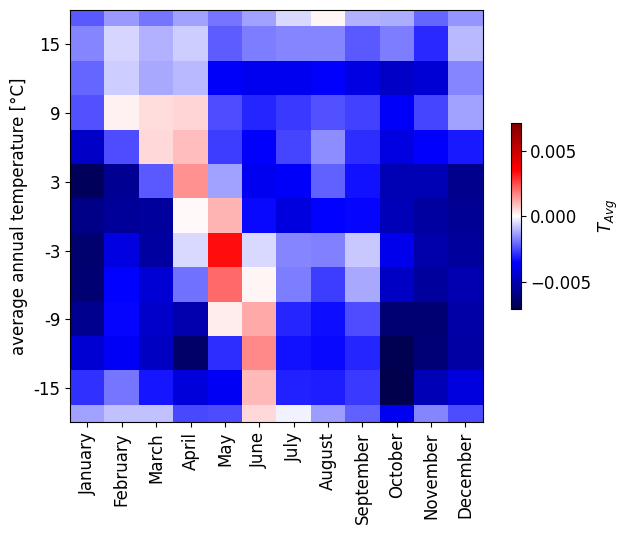

In [ ]:
# Convert the dictionary of lists to a NumPy array
slope_array = np.array([values for values in DTR_trend_month_dict.values()])

print((slope_array[2]))

# x_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lon'].values  # Replace 'your_x_coordinate' with the actual coordinate name
# y_coords = TAvg_time.where(TAvg_mask_dict['0.0']).coords['lat'].values  # Replace 'your_y_coordinate' with the actual coordinate name

boundary = np.max([slope_array.max(), np.abs(slope_array.min())])

# Create a heatmap using Matplotlib
plt.figure(figsize=(17/2.46, 5.5))
heatmap = plt.imshow(slope_array, cmap='seismic', origin='lower', vmin=-boundary, vmax=boundary, aspect=1) #, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])

cbar = plt.colorbar(heatmap, shrink=0.45, label='$T_{Avg}$')
plt.xticks(np.arange(12), month_label, rotation='vertical')
plt.yticks(np.arange(6, 17)[::2], range(-15, 16, 3)[::2])  #, rotation='vertical')
#plt.title('$T_{Avg}$')
plt.ylim((5, 17))
# plt.xlabel('average temperature [°C]')
plt.ylabel('average annual temperature [°C]')

plt.tight_layout()
plt.savefig('binned_trends_heatmap_cut.pdf')
plt.show()


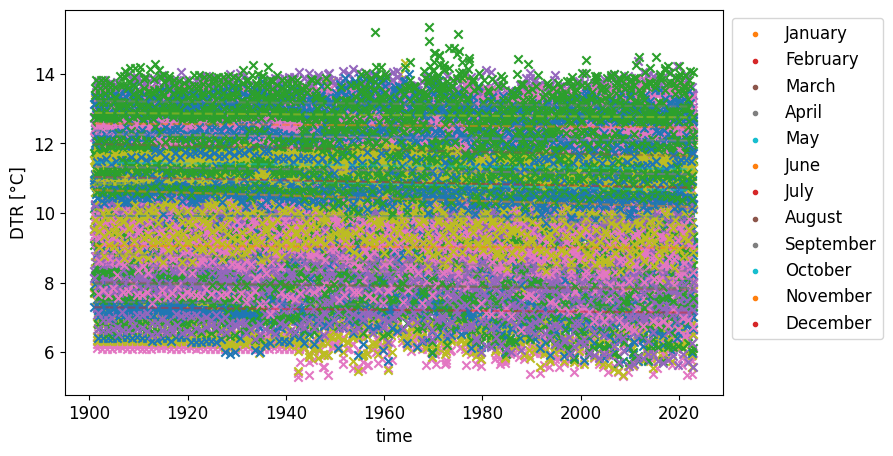

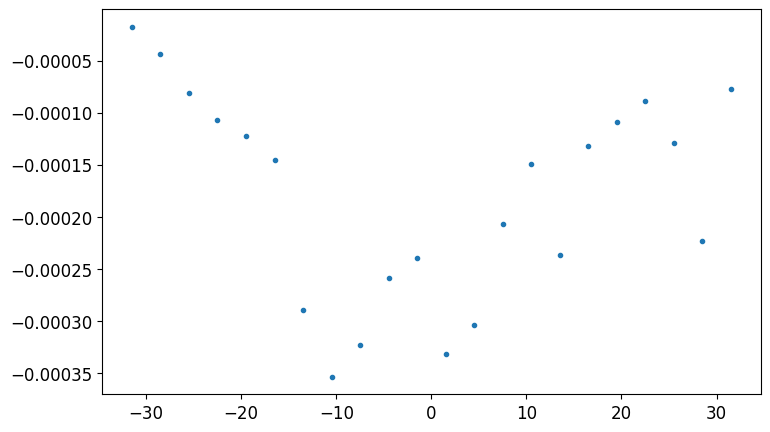

[-1.742605945333513e-05, -4.311746020136674e-05, -8.091628040044903e-05, -0.00010698726030522735, -0.00012247867991575694, -0.0001458857882648314, -0.00028949398078149485, -0.0003537199120952288, -0.0003230625964064013, -0.00025866310731203454, -0.00023971972984580424, -0.00033154216961610663, -0.0003039047809361667, -0.00020662764913469942, -0.0001497412133642254, -0.00023700645383218134, -0.00013225893469619184, -0.00010844860829124687, -8.82631658731992e-05, -0.00012870427751070272, -0.0002234152825245576, -7.721441433551407e-05]


In [ ]:
# Create lists to store legend handles
legend_handles = []

# Create lists to store regression coefficients and R-squared values
regression_coeffs = []
r_squared_values = []

# startdate = pd.to_datetime('1973-01-01')
# enddate = pd.to_datetime('2023-01-01')

for i in list(unique_bins.values):
    #color = legend_colors[i - 1]
    # Filter the data for the specified date range (1960-01-01 to 1980-12-31)
    
    
    x = np.arange(len(DTR_binned_timeseries[str(i)]['time']))  # Use an index as x values
    y = DTR_binned_timeseries[str(i)]

    # Fit a linear regression line
    slope, intercept = np.polyfit(x, y, 1)
    
    # Calculate R-squared
    residuals = y - (slope * x + intercept)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot the scatter plot
    plt.scatter(DTR_binned_timeseries[str(i)]['time'], y, marker='x', label= str(i))
    
    # Plot the regression line
    plt.plot(DTR_binned_timeseries[str(i)]['time'], slope * x + intercept, linestyle='--', alpha  = 0.5)

    # Create a dummy scatter plot with no markers to represent the legend
    legend_handles.append(plt.scatter([], [], marker='.'))

    # Append regression coefficients and R-squared values to lists
    regression_coeffs.append(slope)
    r_squared_values.append(r_squared)

# Show the legend outside the plot
plt.legend(handles=legend_handles, labels=month_label, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('time')
plt.ylabel('DTR [°C]')

plt.show()

plt.plot(unique_bins.values + d/2, regression_coeffs, ls = '', marker = '.')

plt.show()

print(regression_coeffs)

Reason for this shift may be the sun. The assumption that the diurnal solar cycle is not important does not hold for lower altitudes.